# Selekcja atrybutów - LASSO

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

Przećwiczymy na znanych danych danych reklamowych, obejmujących sprzedaż produktów i ich budżet reklamowy w trzech różnych mediach telewizyjnych, radiu, gazetach.

In [8]:
df_adv = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
print(df_adv.head())
scaler = StandardScaler()
X = df_adv[['TV', 'radio','newspaper']]
X = scaler.fit_transform(X)
y = df_adv['sales']
y = scaler.fit_transform(y.values.reshape(-1,1))
print(X[:6,:])
print(X.sum(axis=0))
print(X.var(axis=0))



      TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9
[[ 0.96985227  0.98152247  1.77894547]
 [-1.19737623  1.08280781  0.66957876]
 [-1.51615499  1.52846331  1.78354865]
 [ 0.05204968  1.21785493  1.28640506]
 [ 0.3941822  -0.84161366  1.28180188]
 [-1.61540845  1.73103399  2.04592999]]
[ 2.44249065e-14 -9.05941988e-14  4.44089210e-14]
[1. 1. 1.]


In [9]:
X.shape, y.shape, y.squeeze().shape

((200, 3), (200, 1), (200,))

In [10]:
alphas, active, coefs = linear_model.lars_path(X, y.squeeze(), method='lasso', verbose=True)

print(alphas)

print(coefs.shape)
print(coefs[:,0])
print(coefs[:,1])

print(coefs[:,-1])

print(alphas)
print(-np.log1p(alphas))


.[0.78222442 0.56427718 0.00272176 0.        ]
(3, 4)
[0. 0. 0.]
[0.21794725 0.         0.        ]
[ 0.75306591  0.53648155 -0.00433069]
[0.78222442 0.56427718 0.00272176 0.        ]
[-0.57786226 -0.44742385 -0.00271806 -0.        ]


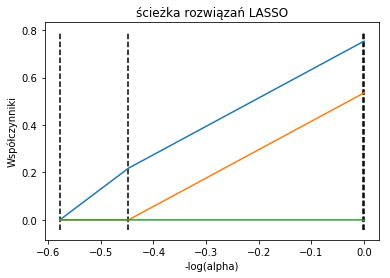

In [11]:
# co krok
#x_plot = np.arange(len(alphas))

# -log(alpha)
x_plot = -np.log1p(alphas)

# współczynniki
#x_plot = np.sum(np.abs(coefs.T), axis=1)
#x_plot /= x_plot[-1]

## alpha
#x_plot = -alphas

plt.plot(x_plot, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(x_plot, ymin, ymax, linestyle='dashed')
#plt.xlabel('|coef| / max|coef|')
plt.xlabel(u'-log(alpha)')
#plt.xlabel('step')
#plt.label('-alpha')
plt.ylabel(u'Współczynniki')
plt.title(u'ścieżka rozwiązań LASSO')
plt.show()


## Zadanie
Z repozytorium UCI https://archive.ics.uci.edu/ml/datasets.html pobierz zbiór dotyczący jakości wina:
https://archive.ics.uci.edu/ml/datasets/Wine+Quality

Przyjmij zmienną <tt>alcohol</tt> jako predyktor i narysuj ścieżkę LASSO.

In [22]:
df_wine_red = pd.read_csv('./winequality-red.csv', sep=";")
df_wine_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [28]:
X = df_wine_red[['fixed acidity', 'volatile acidity','citric acid',
                 'residual sugar', 'chlorides', 'free sulfur dioxide',
                 'total sulfur dioxide','total sulfur dioxide',
                 'density', 'pH', 'sulphates', 'quality']]

X = scaler.fit_transform(X)
y = df_wine_red['alcohol']
y = scaler.fit_transform(y.values.reshape(-1,1))
print(X[:6,:])
print(X.sum(axis=0))
print(X.var(axis=0))

[[-0.52835961  0.96187667 -1.39147228 -0.45321841 -0.24370669 -0.46619252
  -0.37913269 -0.37913269  0.55827446  1.28864292 -0.57920652 -0.78782264]
 [-0.29854743  1.96744245 -1.39147228  0.04341614  0.2238752   0.87263823
   0.62436323  0.62436323  0.02826077 -0.7199333   0.1289504  -0.78782264]
 [-0.29854743  1.29706527 -1.18607043 -0.16942723  0.09635286 -0.08366945
   0.22904665  0.22904665  0.13426351 -0.33117661 -0.04808883 -0.78782264]
 [ 1.65485608 -1.38444349  1.4841536  -0.45321841 -0.26496041  0.10759209
   0.41150046  0.41150046  0.6642772  -0.97910442 -0.46118037  0.45084835]
 [-0.52835961  0.96187667 -1.39147228 -0.45321841 -0.24370669 -0.46619252
  -0.37913269 -0.37913269  0.55827446  1.28864292 -0.57920652 -0.78782264]
 [-0.52835961  0.73841761 -1.39147228 -0.5241662  -0.26496041 -0.27493098
  -0.19667889 -0.19667889  0.55827446  1.28864292 -0.57920652 -0.78782264]]
[ 5.68434189e-13  2.77111667e-13 -1.42108547e-13 -1.98951966e-13
  6.25277607e-13 -9.94759830e-14  7.1054

In [47]:
alphas, active, coefs = linear_model.lars_path(X,y.squeeze(), method='lasso',verbose=True)

print(active)


.[8, 11, 2, 3, 6, 7, 9, 4, 0, 10, 5, 1]


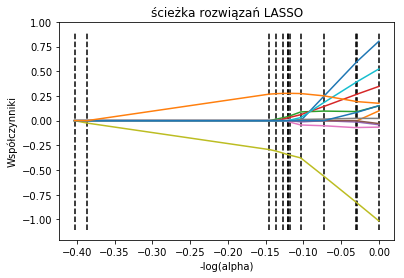

In [40]:
x_plot= -np.log1p(alphas)


plt.plot(x_plot, coefs.T)

ymin,ymax = plt.ylim()

plt.vlines(x_plot, ymin, ymax, linestyle='dashed')

plt.xlabel(u'-log(alpha)')
plt.ylabel(u'Współczynniki')
plt.title(u'ścieżka rozwiązań LASSO')
plt.show()


In [63]:
for i in range(1,X.shape[1]):
      if len(coefs[i][np.abs(coefs[i]) > 0]) > 0:

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.09902203]
[0.         0.         0.         0.01483235 0.02989464 0.0410745
 0.0410745  0.04831675 0.08840708 0.0969503  0.09208351 0.09163684
 0.14984755]
[0.         0.         0.         0.         0.01559866 0.02842509
 0.02842509 0.03348523 0.06054914 0.14382132 0.26429063 0.26890683
 0.3471362 ]
[ 0.          0.          0.          0.          0.          0.
  0.          0.         -0.01264744 -0.00086528 -0.01358677 -0.0139834
 -0.04120413]
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.00241602
 -0.02962959]
[ 0.          0.          0.          0.          0.         -0.00909229
 -0.00909229 -0.01457225 -0.0439019  -0.05163308 -0.07118128 -0.06932256
 -0.06555548]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.01893697e-17 1.9220